# Md Abrar Jahin

## Data Cleaning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install emoji
import pandas as pd
import emoji
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df_one = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Only_USA.csv')

print(df_one.info()) #29934
# print(df_two.info()) #24702
# print(df_three.info()) #22742

<ipython-input-4-47bfc6851641>:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_one = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Only_USA.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411885 entries, 0 to 411884
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  7500 non-null   object
 1   tweet       7500 non-null   object
 2   near        7500 non-null   object
dtypes: object(3)
memory usage: 9.4+ MB
None


In [5]:
#merge all the datasets
#all_df=[df_one]
#all_df=pd.concat(all_df)
all_df=df_one
all_df = all_df.reset_index(drop=True)
print(len(all_df))
empty_tweet=all_df['tweet'].isna().value_counts()
print(empty_tweet) #no empty tweets

411885
True     404385
False      7500
Name: tweet, dtype: int64


In [9]:
all_df['clean_tweet']= all_df['tweet'].copy()
#all_df=all_df.drop('id', axis=1)
all_df = all_df.dropna()
all_df

<ipython-input-9-b6a1a93e6a9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_df['clean_tweet']= all_df['tweet'].copy()


,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,BanMediaHouse whose is responsible for spreadi...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,Im waiting for someone to say to me that all t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,He is a liar. Proven day night. Time again. Li...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,"NEW: U.S. CoronaVirus death toll reaches 4,000..."
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,Ease to re-search - Coronavirus started mainly...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,If J N U is postering in favour of corona clus...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,Gods word is powerful and I promise that if yo...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,"My mom just made me drink boiled lemon, garlic..."


In [10]:
#handle emoji
def convert_emoji(text):
    text=[emoji.demojize(tw) for tw in text]  #run slowly
    new_df= pd.DataFrame(text, columns=['tweet'])
    return new_df
new_df=convert_emoji(all_df['clean_tweet'])
new_df

,tweet
0,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...
1,BanMediaHouse whose is responsible for spreadi...
2,Im waiting for someone to say to me that all t...
3,He is a liar. Proven day night. Time again. Li...
4,"NEW: U.S. CoronaVirus death toll reaches 4,000..."
...,...
7495,Ease to re-search - Coronavirus started mainly...
7496,If J N U is postering in favour of corona clus...
7497,Gods word is powerful and I promise that if yo...
7498,"My mom just made me drink boiled lemon, garlic..."


In [11]:
all_df[['clean_tweet']]=new_df[['tweet']].copy()  
all_df

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,BanMediaHouse whose is responsible for spreadi...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,Im waiting for someone to say to me that all t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,He is a liar. Proven day night. Time again. Li...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,"NEW: U.S. CoronaVirus death toll reaches 4,000..."
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,Ease to re-search - Coronavirus started mainly...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,If J N U is postering in favour of corona clus...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,Gods word is powerful and I promise that if yo...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,"My mom just made me drink boiled lemon, garlic..."


In [12]:
#simple data cleaning
#reference:https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
def preprocessing_one(df):
    #lower all characters
    df['clean_tweet'] = df['clean_tweet'].str.lower()
    #remove all the mentions: @username
    df['clean_tweet'] = df['clean_tweet'].replace(r'@\w+', '', regex=True)
    #remove all the links in the original tweets (start with "www" and "http" and "https")
    df['clean_tweet'] = df['clean_tweet'].replace(r'http\S+|rhttps\S+|rwww\S+', '', regex=True)   
    return df
#Notice: Remove punctuation and special characters after handling contraction words
preprocessing_one(all_df)

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke i will hop on a plane rn! (well after ...
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse whose is responsible for spreadi...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,im waiting for someone to say to me that all t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,he is a liar. proven day night. time again. li...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,"new: u.s. coronavirus death toll reaches 4,000..."
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease to re-search - coronavirus started mainly...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,if j n u is postering in favour of corona clus...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word is powerful and i promise that if yo...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,"my mom just made me drink boiled lemon, garlic..."


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
#Handling repeated characters
#reference: https://github.com/ugis22/analysing_twitter/blob/master/Jupyter%20Notebook%20files/Analysis%20of%20Twitter.ipynb
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
from nltk.corpus import wordnet
#re.sub(pattern, repl, string, count): pattern(Eligible pattern)，repl(replace to...), string
def repeated_char(word):
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    repl_word = r'\1\2\3'
    if wordnet.synsets(word):
        return word  #test for words existence
    #repl_new= repeat_pattern.sub(repl_word, word)
    repl_new = re.sub(repeat_pattern, repl_word, word)
    if repl_new != word:
        return repeated_char(repl_new)
    else:
        return repl_new
word1='loooove'
print(repeated_char(word1))

love


In [15]:
def check_repeated (tweet):
    repeat_pattern = r'(\w*)(\w+)(\2)(\w*)'
    word_set = [''.join(i) for i in re.findall(repeat_pattern, tweet)]  #find all the words with repeated characters
    for word in word_set:
        if not wordnet.synsets(word):
            tweet=re.sub(word, repeated_char(word), tweet)
    return tweet
#test the function
tweet1='I looove you, soooo much'
print(check_repeated (tweet1))

I love you, so much


In [16]:
#replace words contraction
#reference:https://github.com/kiran-bal/Disaster_tweets_classifier/blob/2e6d648f5ef9cbe67024ad5cf032582fc4dc3a75/version2/notebooks/Disaster_tweet_classifier.ipynb
#re.sub(pattern, repl, string, count=0, flags=0): count=0: all matched will be replaced
contraction_dict=[(r'I\'m', 'I am'),(r'i\'m', 'i am'),(r'ain\'t', 'am not'),(r'(\w+)\'s', '\g<1> is'),(r'(\w+)\'re', '\g<1> are'),(r'(\w+)n\'t', '\g<1> not'),
                  (r'can\'t', 'cannot'),(r'won\'t', 'will not'), (r'wont', 'will not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)\'d', '\g<1> would'), (r'(\w+)\'ve', '\g<1> have'),
                 (r'I\’m', 'I am'),(r'i\’m', 'i am'),(r'ain\’t', 'am not'),(r'(\w+)\’s', '\g<1> is'),(r'(\w+)\’re', '\g<1> are'),(r'(\w+)n\’t', '\g<1> not'),
                  (r'can\’t', 'cannot'),(r'won\’t', 'will not'), (r'(\w+)\’ll', '\g<1> will'), (r'(\w+)\’d', '\g<1> would'), (r'(\w+)\’ve', '\g<1> have')]
#Notice: The quotation of some texts are not in English
def handle_contraction(text):
    patterns_set=[(re.compile(pattern), repl) for (pattern, repl) in contraction_dict]
    for (pattern, repl) in patterns_set:
        text=re.sub(pattern, repl, text)
    return text
#test
print(all_df['clean_tweet'][4])
print(handle_contraction(all_df['clean_tweet'][4]))

new: u.s. coronavirus death toll reaches 4,000 after nearly 900 new deaths were reported today (bno news) covid19 coronavirusoutbreak
new: u.s. coronavirus death toll reaches 4,000 after nearly 900 new deaths were reported today (bno news) covid19 coronavirusoutbreak


In [17]:
def preprocessing_two(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: check_repeated(x)) #remove repeated charaters
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: handle_contraction(x)) #handle constraction
    return df
all_df=preprocessing_two(all_df)
all_df

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke i will hop on a plane rn! (well after ...
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse whose is responsible for spreadi...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,im waiting for someone to say to me that all t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,he is a liar. proven day night. time again. li...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,"new: u.s. coronavirus death toll reaches 4,0 a..."
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease to re-search - coronavirus started mainly...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,if j n u is postering in favour of corona clus...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word is powerful and i promise that if yo...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,"my mom just made me drink boiled lemon, garlic..."


In [18]:
#only English character
def replace_non_alphabetical(df):
    df['clean_tweet']=df['clean_tweet'].replace('[^a-zA-Z]',' ', regex=True)
    df['clean_tweet'] = df['clean_tweet'].replace('\s+', ' ', regex=True)
    return df
all_df=replace_non_alphabetical(all_df)
all_df

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke i will hop on a plane rn well after co...
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse whose is responsible for spreadi...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,im waiting for someone to say to me that all t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,he is a liar proven day night time again lies ...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,new u s coronavirus death toll reaches after n...
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease to re search coronavirus started mainly b...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,if j n u is postering in favour of corona clus...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word is powerful and i promise that if yo...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,my mom just made me drink boiled lemon garlic ...


In [19]:
#remove less than two-character words, but keep "no" if len(w)>2 or w=="no"
def short_words(df):
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or w=="no"]))
    return df
all_df=short_words(all_df)
all_df.head()

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke will hop plane well after covid lol
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse whose responsible for spreading ...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,waiting for someone say that all this corona t...
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time again lies when the...
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,new coronavirus death toll reaches after nearl...


In [ ]:
#remove stopwords
#can't remove words like "not" or "no"

In [20]:
#create own stopwords
my_stopwords = ['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'normally', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', '']
print(my_stopwords)

def remove_stopwords(df):
    df['clean_tweet']=df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in my_stopwords]))
    return df
all_df=remove_stopwords(all_df)
all_df
# all_df.to_csv('clean_datasets/all_clean_1_test.csv',index = False, encoding='utf_8_sig')

['a', "a's", 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'conta

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...
...,...,...,...,...
7495,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...
7496,28-08-20,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...
7497,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...
7498,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...


In [21]:
#remove empty tweets
def remove_empty(df):
    df=df[df['clean_tweet']!='']
    return df
all_df=remove_empty(all_df)
all_df=all_df.reset_index(drop=True)
all_df

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...
...,...,...,...,...
7493,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...
7494,28-08-20,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...
7495,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...
7496,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...


In [22]:
#split the clean datasets into three steps
all_df.to_csv('only_USA_clean_1.csv',index = False, encoding='utf_8_sig')

In [23]:
#clean_df = pd.read_csv('/kaggle/input/uk-twitter-covid19-dataset/all_clean_1.csv')
clean_df=all_df
clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')

<ipython-input-23-ad7125c8d310>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df['created_at'] = clean_df['created_at'].str.replace(r'[^\x00-\x7F]+', '')


In [24]:
clean_df

,created_at,tweet,near,clean_tweet
0,20-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol
1,20-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...
2,20-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke
3,20-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid
4,20-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...
...,...,...,...,...
7493,28-08-20,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...
7494,28-08-20,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...
7495,28-08-20,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...
7496,28-08-20,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...


In [25]:
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'] , utc=True).dt.date
#clean_df.to_csv('clean_datasets/all_clean_1.csv',index = False, encoding='utf_8_sig')
clean_df

,created_at,tweet,near,clean_tweet
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...
...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...


In [27]:
clean_all = clean_df

In [28]:
#The number of tweets collected in each city
#London
London_df = clean_all[clean_all['near'].str.contains('United States')]
London_df = London_df.reset_index(drop=True)
print("Total tweets in The United States:",len(London_df))

print(len(London_df))

Total tweets in The United States: 7498
7498


## Further Cleaning and lexicon-based method

In [29]:
import pandas as pd
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [30]:
df=clean_all
#df=pd.read_csv('/kaggle/input/uk-twitter-covid19-dataset/clean_all.csv')
df.head()
len(df)

7498

In [31]:
#tokenization
def tweet_token(text):
    words_set=text.str.split()
    tokens=[word for word in words_set]
    return tokens

df['tokens']=tweet_token(df['clean_tweet'])
df.head()

,created_at,tweet,near,clean_tweet,tokens
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]"
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ..."
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]"
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ..."
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re..."


In [32]:
#lemmatize and stemming
import nltk
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()
word_lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [word_lemmatizer.lemmatize(word) for word in word_tokenizer.tokenize(text)]
df['lemma']=df['clean_tweet'].apply(lemmatize_text)
df.head()

,created_at,tweet,near,clean_tweet,tokens,lemma
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]"
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ..."
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]"
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c..."
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor..."


In [33]:
#lemma_sentence
df['lemma_sentence'] = df['lemma'].apply(lambda x: ' '.join(x))
df.head()

,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...


In [34]:
#POS for clean tweets
#reference:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
#https://stackoverflow.com/questions/51267166/lemmatization-pandas-python
nltk.download('punkt')
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
stem_lemmatizer = WordNetLemmatizer()

def convert_wordnet_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def pos_tag_set(tweet):
    tagged_words = nltk.pos_tag(nltk.word_tokenize(tweet))
    new_tag=[]
    for word, tag in tagged_words:
        new_tag.append(tuple([word, convert_wordnet_tag(tag)]))
    return new_tag
df['pos_tag']=df['clean_tweet'].apply(pos_tag_set)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ..."
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread..."
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april..."
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),..."
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea..."
...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st..."
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl..."
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise..."
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),..."


In [35]:
#create lemma sentence with pos-tags
def handle_lemma(pos_tweet):
    lemma_set = " "
    for word, pos in pos_tweet:
        if not pos: 
            lemma = word
            lemma_set = lemma_set + " " + lemma
        else:  
            lemma = stem_lemmatizer.lemmatize(word, pos=pos)
            lemma_set = lemma_set + " " + lemma
    return lemma_set
df['pos_tag'].apply(handle_lemma)
    
df['lemma_sentence(with POS)'] = df['pos_tag'].apply(handle_lemma)
df

,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS)
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ...",no joke hop plane covid lol
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread...",banmediahouse responsible spread fake commun...
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april...",wait corona thing april fool joke
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),...",liar proven day night time lie truth covid
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea...",coronavirus death toll reach death report to...
...,...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st...",ease search coronavirus start pangolin trade...
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl...",postering favour corona cluster bomb delhi j...
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise...",god word powerful promise put trust survive ...
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),...",mom make drink boil lemon garlic onion stop ...


In [36]:
#save as csv
df.to_csv('further_clean_only_USA.csv',index = False, encoding='utf_8_sig')

In [37]:
further_clean_all = df

In [38]:
#sentiwordnet analysis
#reference: https://github.com/harika-bonthu/Lexicon-based-SentimentAnalysis/blob/main/lexicon_based_sentiment_analysis.ipynb
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#和之前的方法结果 有差距

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        synset = synsets[0] #only take the most common meaning
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
    if not tokens_count:
        return 0
    else:
        return sentiment

df['sentiword_analysis']=df['pos_tag'].apply(sentiwordnetanalysis)
df

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ...",no joke hop plane covid lol,0.375
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread...",banmediahouse responsible spread fake commun...,-0.125
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april...",wait corona thing april fool joke,1.000
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),...",liar proven day night time lie truth covid,0.625
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea...",coronavirus death toll reach death report to...,0.125
...,...,...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st...",ease search coronavirus start pangolin trade...,-0.125
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl...",postering favour corona cluster bomb delhi j...,-0.750
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise...",god word powerful promise put trust survive ...,0.250
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),...",mom make drink boil lemon garlic onion stop ...,0.875


In [39]:
#VADER--low speed--use further clean datasets
sentiment_analyzer = SentimentIntensityAnalyzer()
def vaderSentiment_method(df):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    snt_score = sentiment_analyzer.polarity_scores(df['lemma_sentence(with POS)'])
    return snt_score['compound'] 

df['vader_score'] = df.apply(vaderSentiment_method, axis=1)
df

,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ...",no joke hop plane covid lol,0.375,0.2292
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread...",banmediahouse responsible spread fake commun...,-0.125,-0.2023
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april...",wait corona thing april fool joke,1.000,-0.1779
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),...",liar proven day night time lie truth covid,0.625,-0.2500
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea...",coronavirus death toll reach death report to...,0.125,-0.8271
...,...,...,...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st...",ease search coronavirus start pangolin trade...,-0.125,0.3612
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl...",postering favour corona cluster bomb delhi j...,-0.750,-0.5994
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise...",god word powerful promise put trust survive ...,0.250,0.8591
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),...",mom make drink boil lemon garlic onion stop ...,0.875,-0.5267


In [40]:
#Textblob
from textblob import TextBlob

def Polarity_score(tweet):
    return TextBlob(tweet).sentiment.polarity

def Subjectivity_score(tweet):
    return TextBlob(tweet).sentiment.subjectivity

df['textblob_polarity'] = df['lemma_sentence(with POS)'].apply(Polarity_score) 
df

,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ...",no joke hop plane covid lol,0.375,0.2292,0.80
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread...",banmediahouse responsible spread fake commun...,-0.125,-0.2023,-0.15
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april...",wait corona thing april fool joke,1.000,-0.1779,0.00
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),...",liar proven day night time lie truth covid,0.625,-0.2500,0.00
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea...",coronavirus death toll reach death report to...,0.125,-0.8271,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st...",ease search coronavirus start pangolin trade...,-0.125,0.3612,0.00
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl...",postering favour corona cluster bomb delhi j...,-0.750,-0.5994,0.00
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise...",god word powerful promise put trust survive ...,0.250,0.8591,0.30
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),...",mom make drink boil lemon garlic onion stop ...,0.875,-0.5267,0.00


In [41]:
##save as csv
df.to_csv('unsupervised_lexicon_only_USA.csv',index = False, encoding='utf_8_sig')

## Initial data analysis

In [42]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

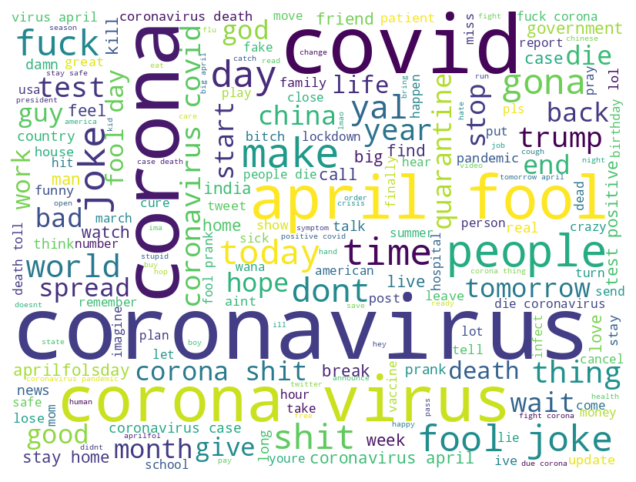

<Figure size 640x480 with 0 Axes>

In [43]:
#word cloud map
#https://www.datacamp.com/community/tutorials/wordcloud-python
def word_cloud(words):
    wordcloud = WordCloud(width=800, height=600, random_state=21, relative_scaling=0.5, background_color="white").generate(words)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
word_set = ' '.join([tweet_word for tweet_word in df['lemma_sentence(with POS)']])
word_cloud(word_set)
plt.savefig('word_cloud_only_USA.jpg')
#vaccine is a hot topic

In [44]:
df['lemma'].value_counts()[0:10]

[breaking, foxnews, alert, coronavirus, death, toll, reach]                                                                         18
[covid, lockdown, situation, existential, crisis, hanging, head, pmkcalscurfewextension]                                             9
[judiciary, biased, impressed, anti, hindu, anti, national, medium, jail, not, safe, prevention, corona, coronariskforprisoners]     8
[idea, accepting, head, shave, challenge, nurse, worked, corona, covid]                                                              7
[reinfection, due, varients, short, time, explanation, danger, covid]                                                                7
[coronavirus, covid, summary, count, coronavirus, case, death, recovered]                                                            6
[update, coronavirus, covid, preparation, resource, rural, capital, area, community, partner]                                        5
[hour, estimated, people, tweeted, laid, coronavirus, c

In [45]:
#Word frequency
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import Counter
texts = df['lemma_sentence(with POS)']
word_counts = Counter(word_tokenize('\n'.join(texts)))
word_top=word_counts.most_common(n=20)
print(word_top)
# count_sum=

[('corona', 3165), ('coronavirus', 2915), ('covid', 2067), ('virus', 1091), ('april', 1019), ('not', 995), ('fool', 882), ('joke', 579), ('people', 487), ('day', 425), ('case', 409), ('shit', 383), ('make', 366), ('no', 356), ('death', 336), ('time', 322), ('fuck', 302), ('test', 290), ('die', 272), ('gona', 262)]


418719


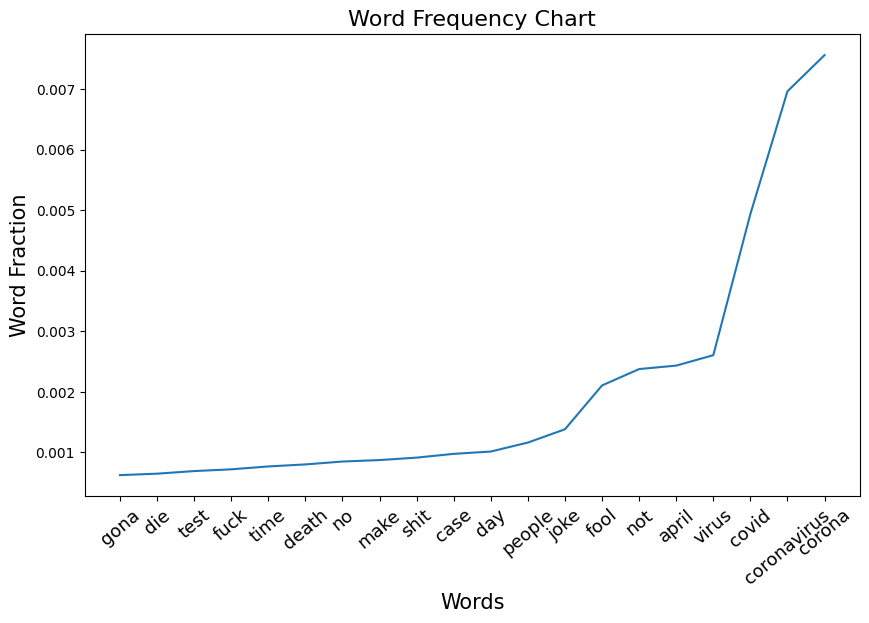

In [46]:
#(5)
count_all = df['lemma_sentence(with POS)'].str.len().sum()
print(count_all)

words=[count[0] for count in word_top]
frac_value=[int(count[1])/count_all for count in  word_top]
words=words[: :-1]
frac_value=sorted(frac_value)

#plot line chart
plt.figure(figsize=(10, 6))
plt.plot(words,frac_value)
plt.xticks(rotation=40, fontsize=13)
plt.xlabel('Words',fontsize=15)
plt.ylabel('Word Fraction',fontsize=15)
plt.title('Word Frequency Chart',fontsize=16)
plt.savefig('word_freq_only_USA.png')

## Data analysis for lexicon-based methods

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
dfs=df
print(len(dfs))

7498


In [49]:
#sentiment for step1
#for textblob and sentiword
def senti_label(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [50]:
#for VADER
def senti_label_2(score):
    if score <= -0.05:
        return -1
    elif score >= 0.05:
        return 1
    else:
        return 0

In [51]:
dfs['senti_textblob'] = dfs['textblob_polarity'].apply(senti_label)
dfs['senti_wordnet'] = dfs['sentiword_analysis'].apply(senti_label)
dfs
#counting
blob_all=dfs.groupby('senti_textblob').count()
print("textblob_all:",blob_all["textblob_polarity"])

wordnet_all=dfs.groupby('senti_wordnet').count()
print("wordnet_all:",wordnet_all["sentiword_analysis"])

#using senti_label_2
dfs['senti_vader'] = dfs['vader_score'].apply(senti_label_2)
vader_all=dfs.groupby('senti_vader').count()
print('vader_all:',vader_all["vader_score"])

textblob_all: senti_textblob
-1    1954
 0    3598
 1    1946
Name: textblob_polarity, dtype: int64
wordnet_all: senti_wordnet
-1    2647
 0    1753
 1    3098
Name: sentiword_analysis, dtype: int64
vader_all: senti_vader
-1    3555
 0    1744
 1    2199
Name: vader_score, dtype: int64


In [52]:
vader_all=dfs.groupby('senti_vader').count()
print(vader_all["vader_score"])
wordnet_all=dfs.groupby('senti_wordnet').count()
print(wordnet_all["sentiword_analysis"])
blob_all=dfs.groupby('senti_textblob').count()
print(blob_all["textblob_polarity"])

senti_vader
-1    3555
 0    1744
 1    2199
Name: vader_score, dtype: int64
senti_wordnet
-1    2647
 0    1753
 1    3098
Name: sentiword_analysis, dtype: int64
senti_textblob
-1    1954
 0    3598
 1    1946
Name: textblob_polarity, dtype: int64


In [53]:
new_dfs = dfs

In [54]:
#extreme positive
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(0.5,1)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(0.5,1)]
print("textbolb",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(0.5,1)]
print("vader",len(slight_pos_vader))
#extreme negative 
slight_pos_wordnet = new_dfs[new_dfs['sentiword_analysis'].between(-1,-0.5)]
print("wordnet:",len(slight_pos_wordnet))
slight_pos_blob = new_dfs[new_dfs['textblob_polarity'].between(-1,-0.5)]
print("textblob",len(slight_pos_blob))
slight_pos_vader = new_dfs[new_dfs['vader_score'].between(-1,-0.5)]
print("vader",len(slight_pos_vader))

wordnet: 1343
textbolb 529
vader 796
wordnet: 1190
textblob 474
vader 1826


# Supervised Approaches

In [55]:
import pandas as pd
import numpy as np
import gensim 
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings
warnings.filterwarnings("ignore")

In [56]:
df

,created_at,tweet,near,clean_tweet,tokens,lemma,lemma_sentence,pos_tag,lemma_sentence(with POS),sentiword_analysis,vader_score,textblob_polarity,senti_textblob,senti_wordnet,senti_vader
0,2020-08-20,NO JOKE I WILL HOP ON A PLANE RN! (Well after ...,United States,no joke hop plane covid lol,"[no, joke, hop, plane, covid, lol]","[no, joke, hop, plane, covid, lol]",no joke hop plane covid lol,"[(no, None), (joke, n), (hop, n), (plane, n), ...",no joke hop plane covid lol,0.375,0.2292,0.80,1,1,1
1,2020-08-20,BanMediaHouse whose is responsible for spreadi...,United States,banmediahouse responsible spreading fake commu...,"[banmediahouse, responsible, spreading, fake, ...","[banmediahouse, responsible, spreading, fake, ...",banmediahouse responsible spreading fake commu...,"[(banmediahouse, n), (responsible, a), (spread...",banmediahouse responsible spread fake commun...,-0.125,-0.2023,-0.15,-1,-1,-1
2,2020-08-20,Im waiting for someone to say to me that all t...,United States,waiting corona thing april fools joke,"[waiting, corona, thing, april, fools, joke]","[waiting, corona, thing, april, fool, joke]",waiting corona thing april fool joke,"[(waiting, v), (corona, a), (thing, n), (april...",wait corona thing april fool joke,1.000,-0.1779,0.00,0,1,-1
3,2020-08-20,He is a liar. Proven day night. Time again. Li...,United States,liar proven day night time lies truth covid,"[liar, proven, day, night, time, lies, truth, ...","[liar, proven, day, night, time, lie, truth, c...",liar proven day night time lie truth covid,"[(liar, a), (proven, r), (day, n), (night, n),...",liar proven day night time lie truth covid,0.625,-0.2500,0.00,0,1,-1
4,2020-08-20,"NEW: U.S. CoronaVirus death toll reaches 4,000...",United States,coronavirus death toll reaches deaths reported...,"[coronavirus, death, toll, reaches, deaths, re...","[coronavirus, death, toll, reach, death, repor...",coronavirus death toll reach death reported to...,"[(coronavirus, n), (death, n), (toll, n), (rea...",coronavirus death toll reach death report to...,0.125,-0.8271,0.00,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,2020-08-28,Ease to re-search - Coronavirus started mainly...,United States,ease search coronavirus started pangolin trade...,"[ease, search, coronavirus, started, pangolin,...","[ease, search, coronavirus, started, pangolin,...",ease search coronavirus started pangolin trade...,"[(ease, n), (search, n), (coronavirus, n), (st...",ease search coronavirus start pangolin trade...,-0.125,0.3612,0.00,0,-1,1
7494,2020-08-28,If J N U is postering in favour of corona clus...,United States,postering favour corona cluster bombs delhi jn...,"[postering, favour, corona, cluster, bombs, de...","[postering, favour, corona, cluster, bomb, del...",postering favour corona cluster bomb delhi jnu...,"[(postering, v), (favour, a), (corona, n), (cl...",postering favour corona cluster bomb delhi j...,-0.750,-0.5994,0.00,0,-1,-1
7495,2020-08-28,Gods word is powerful and I promise that if yo...,United States,gods word powerful promise put trust survive c...,"[gods, word, powerful, promise, put, trust, su...","[god, word, powerful, promise, put, trust, sur...",god word powerful promise put trust survive covid,"[(gods, n), (word, n), (powerful, a), (promise...",god word powerful promise put trust survive ...,0.250,0.8591,0.30,1,1,1
7496,2020-08-28,"My mom just made me drink boiled lemon, garlic...",United States,mom made drink boiled lemon garlic onion stop ...,"[mom, made, drink, boiled, lemon, garlic, onio...","[mom, made, drink, boiled, lemon, garlic, onio...",mom made drink boiled lemon garlic onion stop ...,"[(mom, n), (made, v), (drink, n), (boiled, v),...",mom make drink boil lemon garlic onion stop ...,0.875,-0.5267,0.00,0,1,-1


In [57]:
#sample data
positive_df = df[df["senti_vader"] == 1]
positive_df = positive_df[:1000] #1000 positive sentiment
neutral_df = df[df["senti_vader"] == 0]
neutral_df = neutral_df[:1000] #1000 neutral sentiment
negative_df = df[df["senti_vader"] == -1]
negative_df = negative_df[:1000] #1000 neutral sentiment

In [58]:
df=[positive_df, neutral_df, negative_df]
df=pd.concat(df)
df=df.reset_index(drop=True)
df.to_csv('sample_data_only_USA.csv', index=False, encoding='utf_8_sig')